In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [7]:
data = pd.read_csv('/Decision_Tree_Income_Prediction.csv')
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [8]:
key_word1 = '?'
counter = 0
with open('/Decision_Tree_Income_Prediction.csv',encoding='UTF-8') as a:
  for line in a:
    if (key_word1) in line:
        counter = counter + 1
print(counter)

2399


In [9]:
data1 = data[~data['workclass'].isin(['?'])]

In [33]:
# data1.drop('capital.gain',axis=1, inplace=True)
# data1.drop('capital.loss',axis=1, inplace=True)
# data1.drop('workclass',axis=1, inplace=True)
data1 = pd.read_csv('/Decision_Tree_Income_Prediction.csv', usecols=['age', 'income', 'education.num', 'hours.per.week'])
data1

,age,education.num,hours.per.week,income
0,90,9,40,<=50K
1,82,9,18,<=50K
2,66,10,40,<=50K
3,54,4,40,<=50K
4,41,10,40,<=50K
...,...,...,...,...
32556,22,10,40,<=50K
32557,27,12,38,<=50K
32558,40,9,40,>50K
32559,58,9,40,<=50K


In [34]:
# Replace() syntax
data1.replace('<=50K', '0', inplace=True)
data1.replace('>50K', '1', inplace=True)
data1

,age,education.num,hours.per.week,income
0,90,9,40,0
1,82,9,18,0
2,66,10,40,0
3,54,4,40,0
4,41,10,40,0
...,...,...,...,...
32556,22,10,40,0
32557,27,12,38,0
32558,40,9,40,1
32559,58,9,40,0


In [35]:
x = data1.drop('income', axis = 1)
y = data1['income']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42 )

In [37]:
clf = DecisionTreeClassifier()

In [38]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [39]:
y_pred = clf.predict(x_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is: ", accuracy)

Accuracy is:  0.7707032449585424


In [41]:
cm = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['0', '1'])
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[6714  715]
 [1525  815]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.86      7429
           1       0.53      0.35      0.42      2340

    accuracy                           0.77      9769
   macro avg       0.67      0.63      0.64      9769
weighted avg       0.75      0.77      0.75      9769



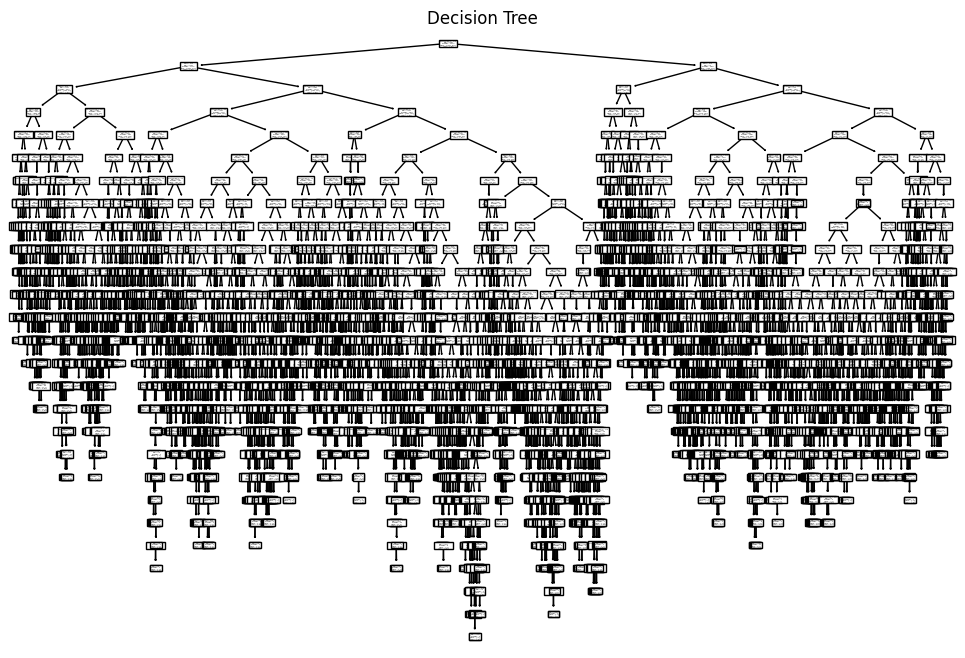

In [42]:
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=x.columns, class_names=data['income'].unique())
plt.title("Decision Tree")
plt.show()